 ## INTRODUCTION / THEORY - for part a


When a charged particle (electron, proton) moves in electric and magnetic fields its motion is governed by Lorentz force law:
$$
\vec{F} = q(\vec{E} + \vec{v} \times \vec{B})
$$
Where:

q = charge of particle

$\vec{E}$ = electric field

$\vec{B}$ = magnetic field

$\vec{v}$ = velocity of the particle

$\times$ = cross product


From Newton's second law  $\vec{F} = m\vec{a}$ => $\vec{F}$ = $m\frac{d\vec{v}}{dt}$ 

=> $\frac{d\vec{v}}{dt} = \frac{q}{m}(\vec{E} + \vec{v} \times \vec{B})$

We also know how particles are moving:

$\frac{d\vec{y}}{dt} = \vec{v}$

Where $\vec{y}$ is the position of the particle.

$\text{\textbf{Goal}}$ : Solve the differential equations numerically


Physical expectations:
- Electric fiel will accelerate the particle in the direction of the field
- Magnetic field will make the particle move in a circular motion perpendicular to the field
- Both fields will make the particle move in a helical motion


 ## NUMERICAL METHODS


a) $\text{\textbf{Euler Algorithm}}$

First order:

$\vec{v_{n+1}} = \vec{v_{n}} + \frac{q}{m}(\vec{E} + \vec{v} \times \vec{B})\Delta t$

$\vec{y_{n+1}} = \vec{y_{n}} + \vec{v_{n}}\Delta t$



Iterative step example:

- We suppose at step n the follwoing values:

$\vec{v_{n}} = (1,0,0)$, 
$\vec{y_{n}} = (0,0,0)$,
$\vec{B} = (0,0,1)$,
$\vec{E} = (0,0,0)$.
$\frac{q}{m} = 1$,
$\Delta t = 0.01$

- We input the values:

$\vec{v_{n+1}} = (1,0,0) + 1*((0,0,0) + (1,0,0) \times (0,0,1))*0.01 = (1, -0.01, 0)$

$\vec{y_{n+1}} = (0,0,0) + (1,0,0) * 0.01 = (0.01,0,0)$


b) $\text{\textbf{Euler Richardson Algorithm}}$

This approach is more accurate:

$\vec{v_{mid}} = \vec{v_{n}} + \frac{1}{2} * \frac{q}{m} * (\vec{E} + \vec{v_{n}} \times \vec{B})* \Delta t$

$\vec{y_{mid}} = \vec{y_{n}} + \frac{1}{2} * \vec{v_{n}} * \Delta t$

$\vec{v_{n+1}} = \vec{v_{n}} + \frac{q}{m} * (\vec{E} + \vec{v_{mid}} \times \vec{B})* \Delta t$

$\vec{y_{n+1}} = \vec{y_{n}} + \vec{v_{mid}} * \Delta t$


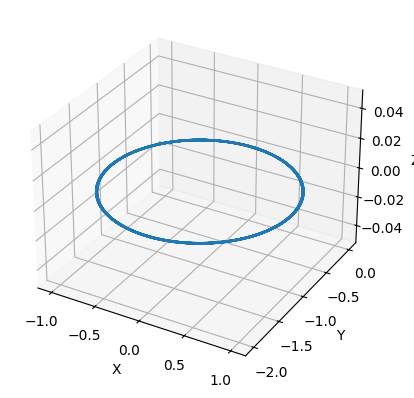

In [ ]:
#code for a)

import numpy as np
import matplotlib.pyplot as plt

q = 1.0 
m = 1.0
E = np.array([0.0, 0.0, 0.0])
B = np.array([0.0, 0.0, 1.0])
t = 0.1
steps = 1000
y_initial = np.array([0.0, 0.0, 0.0])
v_initial = np.array([1.0, 0.0, 0.0])

methods = ['euler', 'euler-richardson']


for method in methods:
    y = np.zeros((steps, 3))
    v = np.zeros((steps, 3))
    y[0] = y_initial
    v[0] = v_initial
    for i in range(steps - 1):
        if method == 'euler':
            v[i+1] = v[i] + (q/m) * (E + np.cross(v[i], B)) * t
            y[i+1] = y[i] + v[i] * t
        elif method == 'euler-richardson':
            v_mid = v[i] + (q/m) * (E + np.cross(v[i], B)) * t/2
            y_mid = y[i] + v[i] * t/2
            v[i+1] = v[i] + (q/m) * (E + np.cross(v_mid, B)) * t
            y[i+1] = y[i] + v_mid * t

figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.plot(y[:,0], y[:,1], y[:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## INTRODUCTION / THEORY - for part b

- Homogenous electric field means that $\vec{E}$ is constant in space and time
- Magnetic field $\vec{B}$ is absent here so it is equal to 0
- We have the motion which is like a falling object under gravity 
- Acceleration comes from the electric field

$\frac{d\vec{v}}{dt} = \frac{q}{m} * \vec{E}$

$\frac{d\vec{y}}{dt} = \vec{v}$


1)Analytical Solution

- Constant acceleration $ a = \frac{q* E}{m}$

- Velocity $v(t) = v_0 + a * t$

- Position $y(t) = y_0 + v_0 * t + \frac{1}{2} * a * t^2$

2)Numercial Solution
- We use Euler or Euler Richardson Algorithm to update velocity and position at each time step




## NUMERICAL METHODS

a) $\text{\textbf{Euler Algorithm}}$

$\vec{v_{n+1}} = \vec{v_{n}} + \frac{q * E}{m} * \Delta t$

$\vec{y_{n+1}} = \vec{y_{n}} + \vec{v_{n}} * \Delta t$

b) $\text{\textbf{Euler-Richardson Algorithm}}$

$\vec{v_{mid}} = \vec{v_{n}} + \frac{q*E}{2m} * \Delta t$

$\vec{y_{mid}} = \vec{y_{n}} + \frac{1}{2} * \vec{v_{n}} * \Delta t$

$\vec{v_{n+1}} = \vec{v_{n}} + \frac{q * E}{m}*\Delta t$

$\vec{y_{n+1}} = \vec{y_{n}} + \vec{v_{mid}} * \Delta t $


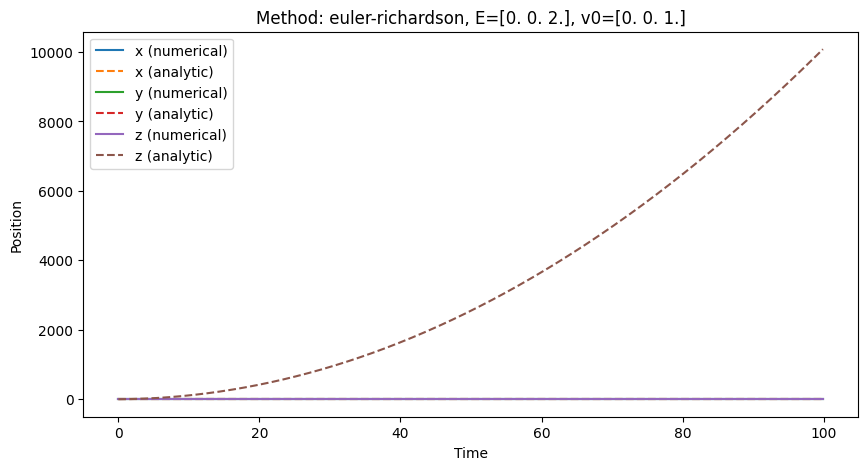

In [ ]:
#code for b)

import numpy as np
import matplotlib.pyplot as plt

q = 1.0
m = 1.0
E_test = [
    np.array([1.0, 0.0, 0.0]),
    np.array([0.0, 1.0, 0.0]),
    np.array([0.0, 0.0, 2.0])
]

v_initial_test =[
    np.array([0.0, 0.0, 0.0]),
    np.array([0.5, 0.0, 0.0]),
    np.array([0.0, 0.0, 1.0])
]

y_initial = np.array([0.0, 0.0, 0.0])

dt= 0.1
steps = 1000

methods = ['euler', 'euler-richardson']

t = np.arange(steps) * dt

for method in methods:
    for E in E_test:
        for v_initial in v_initial_test:
            y = np.zeros((steps, 3))
            v = np.zeros((steps, 3))
            y[0] = y_initial
            v[0] = v_initial
            for i in range(steps - 1):
                a = (q*E)/m
                if m == 'euler':
                    v[i+1] =v[i] + a * dt
                    y[i+1] = y[i] + v[i] * dt
                elif m == 'euler-richardson':
                    v_mid = v[i] + a * dt/2
                    v[i+1] = v[i] + a * dt
                    y[i+1] = y[i] + v_mid * dt


y_analytic = y_initial + v_initial[np.newaxis,:]*t[:,np.newaxis] + 0.5*(q*E/m)*t[:,np.newaxis]**2

plt.figure(figsize=(10,5))
for j, comp in enumerate(['x','y','z']):
    plt.plot(t, y[:,j], label=f'{comp} (numerical)')
    plt.plot(t, y_analytic[:,j], '--', label=f'{comp} (analytic)')
            
plt.title(f"Method: {method}, E={E}, v0={v_initial}")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()






## INTRODUCTION / THEORY - for part c


- a homogenous magnetic field means that in the simulation $\vec{B}$ = constant at every time step and every position of the particle and E=0


Lorentz Force in a Magnetic Field

$\vec{F} = q * (\vec{v} \times \vec{B})$

- the force is perpendicular to the velocity $\vec{v}$
- because of the perpendicularity the speed remains constant and only the direction will change
- if velocity is fully perpendicular we will have a circle motion

$\vec{a} = \frac{\vec{F}}{m} = \frac{q}{m}*({\vec{v} \times \vec{B}})$  - theoretical/analytic acceleration

- computing acceleration at each step $\vec{a_{n}} = \frac{\vec{v_{n+1}} - \vec{v_{n}}}{\Delta t}$  - numerical acceleration

- we computed the acceleration this will be the core equation for our numerical integration



## NUMERICAL METHODS

a) Euler Method

$\vec{v_{n+1}} = \vec{v_{n}} + \frac{q}{m}{\vec{v} \times \vec{B}} * \Delta t$

$\vec{y_{n+1}} = \vec{y_{n}} + \vec{v_{n}} * \Delta t$

b) Euler Richardson

$\vec{v_{mid}} = \vec{v_{n}} + \frac{\Delta t}{2} * \frac{q}{m} * (\vec{v} \times \vec{B})$

$\vec{y_{mid}} = \vec{y_{n}} + \frac{\Delta t}{2} * \vec{v_{n}}$

$\vec{v_{n+1}} = \vec{v_{n}} + \Delta t * \frac{q}{m}(\vec{v_{mid}} \times \vec{B})$

$\vec{y_{n+1}} = \vec{y_{n}} + \Delta t * \vec{v_{mid}}$

- we use this methods to numerically integrate the motion



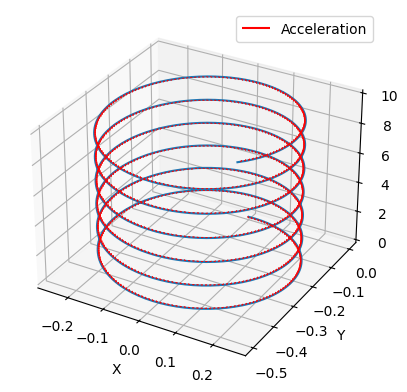

In [14]:
#code for c)

import numpy as np
import matplotlib.pyplot as plt

q_test =[1.0, -1.0, 2.0]
m = 1.0

E = np.array([0.0, 0.0, 0.0])    
B_test =[
    np.array([1.0, 0.0, 0.0]),
    np.array([0.0, 1.0, 0.0]),
    np.array([0.0, 0.0, 2.0])
]

y_initial = np.array([0.0, 0.0, 0.0])
v_initial = np.array([1.0, 0.0, 1.0])
dt = 0.01
steps = 1000

methods = ['euler', 'euler-richardson']

for method in methods:
    for q in q_test:
        for B in B_test:
            y= np.zeros((steps, 3))
            v = np.zeros((steps, 3))
            y[0] = y_initial
            v[0] = v_initial
            for i in range(steps - 1):
                a = (q/m) * np.cross(v[i], B)
                if method == 'euler':
                    v[i+1] = v[i] + a * dt
                    y[i+1] = y[i] + v[i] * dt
                elif method == 'euler-richardson':
                    v_mid = v[i] + a * dt/2
                    y_mid = y[i] + v[i] * dt/2
                    v[i+1] = v[i] + (q/m) * np.cross(v_mid, B) * dt
                    y[i+1] = y[i] + v_mid * dt



figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.plot(y[:,0], y[:,1], y[:,2])
a_numeric = (v[1:] - v[:-1]) / dt
a_mag = np.linalg.norm(a_numeric, axis=1)
ax.quiver(
    y[:-1,0], y[:-1,1], y[:-1,2],
    a_numeric[:,0], a_numeric[:,1], a_numeric[:,2],
    color='red', length=0.004, normalize=True, label='Acceleration'
)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()





## Introduction / Theorey - for part d

- Lorentz Force $\vec{F} = q * (\vec{E} + \vec{v} \times \vec{B})$

Where:

q = charge of particle

$\vec{E}$ = electric field

$\vec{B}$ = magnetic field

$\vec{v}$ = velocity of the particle

$\times$ = cross product

q * $\vec{E}$ = electric force and accelerates in the direction of the field

$\vec{v} \times \vec{B}$ = magnetic force and accelerates perpendicular to both velocity and magnetic field


When we turn on the electric and magnetic fields at the same time we have two cases:

CASE 1: $\vec{E} || \vec{B}$

- magnetic field and electric field move into the same direction
- electric field accelerates the particle alongside $\vec{B}$
- magnetic field generates circular motion due to perpendicularity to $\vec{B}$
- so alltogether we should have a spiral like motion

CASE 2: $\vec{E} \perp \vec{B}$

- electric field pushes the particle in one direction
- magnetic field trajectory is perpendicular
- we are going to have a curved path
- the velocity will be independent of the charge or mass and will depends only on the field strength and orientation

$\vec{v_{mid}} = \frac{\vec{E} \times \vec{B}}{B^2}$

CASE 3: a combination of Case 1 and Case 2

- $\vec{B}$ will determine a helical like motion
- $\vec{E}$ will determine the acceleration

## NUMERICAL METHODS

a) Euler Method

$\vec{v_{n+1}} = \vec{v_{n}} + \frac{q}{m}(\vec{E} + \vec{v} \times \vec{B})\Delta t$

$\vec{y_{n+1}} = \vec{y_{n}} + \vec{v_{n}}\Delta t$

b) Euler-Richardson method

$\vec{v_{mid}} = \vec{v_{n}} + \frac{1}{2} * \frac{q}{m} * (\vec{E} + \vec{v_{n}} \times \vec{B})* \Delta t$

$\vec{y_{mid}} = \vec{y_{n}} + \frac{1}{2} * \vec{v_{n}} * \Delta t$

$\vec{v_{n+1}} = \vec{v_{n}} + \frac{q}{m} * (\vec{E} + \vec{v_{mid}} \times \vec{B})* \Delta t$

$\vec{y_{n+1}} = \vec{y_{n}} + \vec{v_{mid}} * \Delta t$



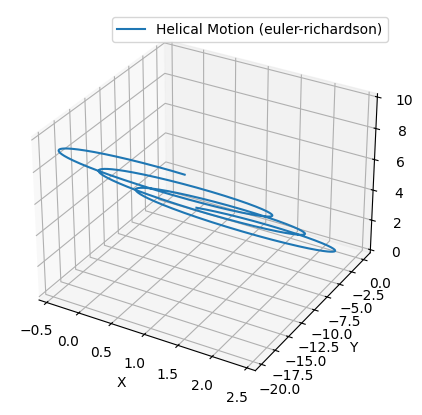

In [16]:
#code for d)

import numpy as np
import matplotlib.pyplot as plt

q = 1.0
m = 1.0

E_cases = [
    np.array([0.0, 0.0, 1.0]),
    np.array([1.0, 0.0, 0.0]),
]

B = np.array([0.0, 0.0, 1.0])

y_initial = np.array([0.0, 0.0, 0.0])
v_initial = np.array([1.0, 0.0, 0.5])

dt = 0.01
steps = 2000

methods = ['euler', 'euler-richardson']


for method in methods:
    for E in E_cases:
        y = np.zeros((steps, 3))
        v = np.zeros((steps, 3))
        y[0] = y_initial
        v[0] = v_initial

        for step in range(steps - 1):
            a = (q/m) * (E + np.cross(v[step], B))
            if method == 'euler':
                v[step+1] = v[step] + a * dt
                y[step+1] = y[step] + v[step] * dt
            elif method == 'euler-richardson':
                v_mid = v[step] + a * dt/2
                y_mid = y[step] + v[step] * dt/2
                v[step+1] = v[step] + (q/m) * (E + np.cross(v_mid, B)) * dt
                y[step+1] = y[step] + v_mid * dt



figure = plt.figure(figsize=(8, 5)) 
ax = figure.add_subplot(111, projection='3d')
ax.plot(y[:,0], y[:,1], y[:,2], label=f"Helical Motion ({method})")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


### How does the result change with the initial velocity of the particle?

- if we take $\vec{v}$ = 0 initially the magnetic force is zero and the electric field starts accelerating the particle
- if we take a value >0 for velocity the magnetic force starts growing and bends the tajectory

- but also the direction of the initial velocity will make changes in the shape of the motion:
   
   1)if velocity moves along $\vec{B}$ the particle moves along the field line straightly

   2)if velocity is perpendicular to $\vec{B}$ particle moves in a circle

   3)if velocity is parallel we will have a spiral motion


### Does the trajectory depend on the relative orientation of electric and magnetic fields?

Yes it depends, because the electric field affects the acceleration and the magnetic field influences the direction of the velocity

- we had the case 1 where electric field is parallel to the magnetic field - both fields move along side the same axes, magnetic circle curves the particle in a circle while the electric field influences the acceleration along the field line and the trajectory becomes a spiral alongside $\vec{B}$

- we have case 2 where elctric field is perpendicular to the magnetic field - the electric field pushes the charge while the magnetic field bends it

## INTRODUCTION / THEORY - fort part e

- for this part we introduce two charged particles we have $q_1$ and $q_2$ with positions $\vec{y_1}(t)$ and $\vec{y_2}(t)$ and velocities $\vec{v_1}(t)$ and $\vec{v_2}(t)$

- we have a new interaction between the particles which is the electrostatic force

$F_{12} = k_e * \frac{q_1 * q_2}{|y_1 - y_2|} * (y_1 - y_2)$

total acceleration of some particle i is:

$a_{i} = \frac{1}{m_i}(q_i(E + v_i \times \vec{B})+ \sum F_{ij})$

## NUMERICAL METHODS - per particle

a) Euler Method

$\vec{v_i}(n+1) = \vec{v_i}(n) + \vec{a_i}(n) * \Delta t$

$\vec{y_i}(n+1) = \vec{y_i}(n) + \vec{v_i}(n) * \Delta t$

b) Euler-Richardson method

$\vec{v_{i,mid}} = \vec{v_i}(n) + \frac{\vec{a_i}(n) * \Delta t}{2}$

$\vec{y_{i,mid}} = \vec{y_i}(n) + \frac{\vec{v_i}(n) * \Delta t}{2}$

$\vec{v_i}(n+1) = \vec{v_i}(n) + a_{i,mid} * \Delta t$

$\vec{y_i}(n+1) = \vec{y_i}(n) + v_{i,mid} * \Delta t$

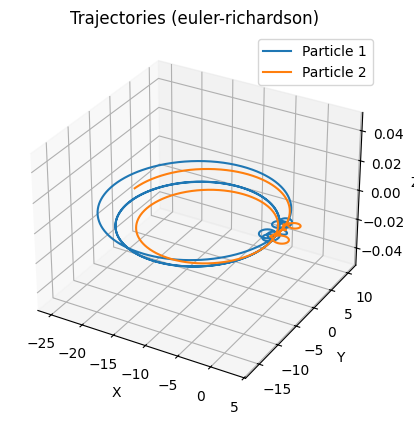

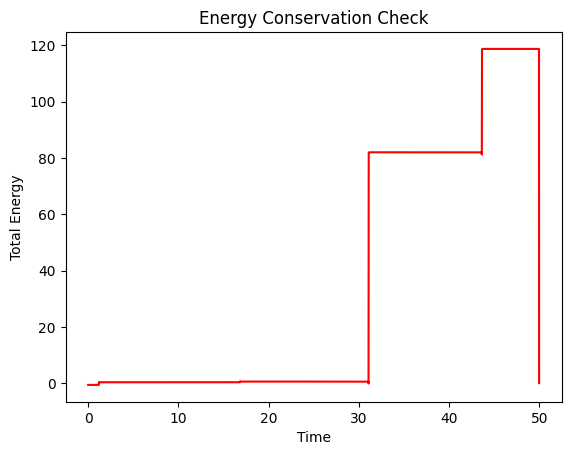

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

q1 = 1.0
q2 = -1.0
m1 = 1.0
m2 = 2.0
k = 1.0

E = np.array([0.0, 0.0, 0.0])
B = np.array([0.0, 0.0, 1.0])

y1_0 = np.array([0.0, 0.0, 0.0])
y2_0 = np.array([1.0, 0.0, 0.0])
v1_0 = np.array([0.0, 0.5, 0.0])
v2_0 = np.array([0.0, -0.5, 0.0])

dt = 0.01
steps = 5000
method = 'euler-richardson'   #

y = np.zeros((steps, 2, 3))
v = np.zeros((steps, 2, 3))
energy = np.zeros(steps)

y[0, 0], y[0, 1] = y1_0, y2_0
v[0, 0], v[0, 1] = v1_0, v2_0

for i in range(steps - 1):
    r12 = y[i, 0] - y[i, 1]
    dist = np.linalg.norm(r12)
    if dist == 0:
        continue
    
    F12 = k * q1 * q2 * r12 / dist**3
    
    a1 = (q1 / m1) * (E + np.cross(v[i, 0], B)) + F12 / m1
    a2 = (q2 / m2) * (E + np.cross(v[i, 1], B)) - F12 / m2

    if method == 'euler':
        v[i + 1, 0] = v[i, 0] + a1 * dt
        v[i + 1, 1] = v[i, 1] + a2 * dt
        y[i + 1, 0] = y[i, 0] + v[i, 0] * dt
        y[i + 1, 1] = y[i, 1] + v[i, 1] * dt

    elif method == 'euler-richardson':
        v1_mid = v[i, 0] + a1 * dt / 2
        v2_mid = v[i, 1] + a2 * dt / 2
        y1_mid = y[i, 0] + v[i, 0] * dt / 2
        y2_mid = y[i, 1] + v[i, 1] * dt / 2

        r12_mid = y1_mid - y2_mid
        dist_mid = np.linalg.norm(r12_mid)
        F12_mid = k * q1 * q2 * r12_mid / dist_mid**3

        a1_mid = (q1 / m1) * (E + np.cross(v1_mid, B)) + F12_mid / m1
        a2_mid = (q2 / m2) * (E + np.cross(v2_mid, B)) - F12_mid / m2

        v[i + 1, 0] = v[i, 0] + a1_mid * dt
        v[i + 1, 1] = v[i, 1] + a2_mid * dt
        y[i + 1, 0] = y[i, 0] + v1_mid * dt
        y[i + 1, 1] = y[i, 1] + v2_mid * dt

    kinetic = 0.5 * m1 * np.linalg.norm(v[i, 0])**2 + 0.5 * m2 * np.linalg.norm(v[i, 1])**2
    potential = k * q1 * q2 / dist
    energy[i] = kinetic + potential

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(y[:, 0, 0], y[:, 0, 1], y[:, 0, 2], label='Particle 1')
ax.plot(y[:, 1, 0], y[:, 1, 1], y[:, 1, 2], label='Particle 2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title(f"Trajectories ({method})")
plt.show()

time = np.arange(steps) * dt
plt.plot(time, energy, color='red')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Energy Conservation Check')
plt.show()
